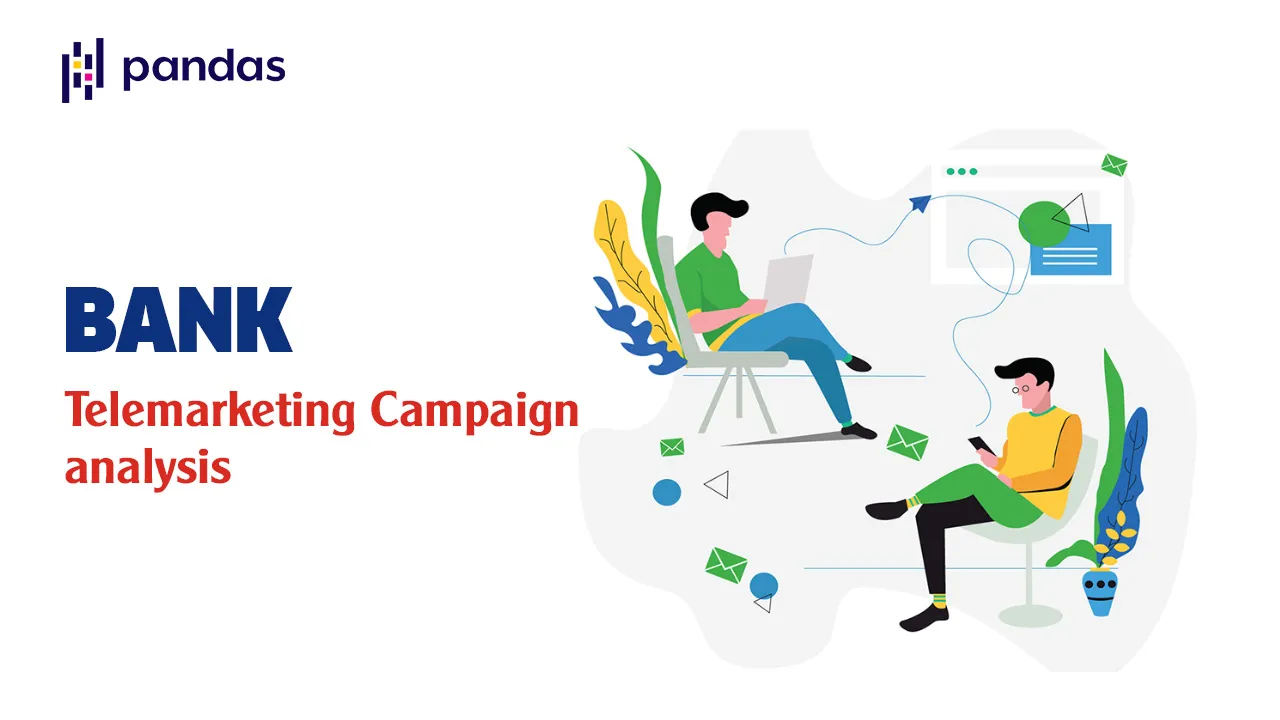

## 1. Introduction

The aim of this project is to develop classification models capable of accurately identifying customers willing to subscribe to long-term deposits based on their demographic and social characteristics. Additionally, we aim to assess the significance of these characteristics. By achieving these objectives, we could provide a valuable tool for banks to enhance their telemarketing efforts by focusing on customers more likely to meet the subscription criteria.

## 2. About the Dataset 

The original data was collected from 2008 to 2010 from a Portuguese retail bank by Sergio Moro in his research paper "A data-driven approach to predict the success of bank telemarketing". It contains 41188 observations with 21 variables related to bank client, product, and social-economic attributes. 
The dataset was obtained from UCI Machine Learning Repository for our analysis. 

- Original research paper: https://www.sciencedirect.com/science/article/abs/pii/S016792361400061X?via%3Dihub#preview-section-cited-by
- Dataset retrieving source: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
import pandas as pd 

In [9]:
bank_raw = pd.read_csv('Bank full data imported.csv')

In [21]:
bank_raw

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
# Making a list of every variable in this dataset
variables_list = bank_raw.columns
variables_list

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [14]:
len(variables_list)

21

The dataset contains 41188 records of the bank's clients,with 21 variables

In [35]:
bank_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- 5 variables float type
- 5 variables integer type
- 11 variables character type

In [25]:
# Specify the correct file path
bank_schema_fname = "bank_data_schema.csv"

In [31]:
# Read CSV file with 'Variable' as the index column, and access the 'Definition' column using regular indexing
bank_schema = pd.read_csv(bank_schema_fname, index_col='Variable').Definition

In [32]:
bank_schema

Variable
age                                                             Age
job                                                             Job
marital                                             Marital status 
education                               Level of education received
default                               Whether has credit in default
housing                                    Whether has housing loan
loan                                      Whether has personal loan
contact                                  Contact communication type
month                                            Last contact month
day_of_week                            Last contact day of the week
duration                                      Last contact duration
campaign          Number of contacts performed during this campa...
pdays             Number of days that passed by after the client...
previous          Number of contacts performed before this campa...
poutcome                 outcome of the

- Variables from "age" to "loan" indicate personal attributes of the client.
- Variables from "contact" to "poutcome" indicate attributes regarding the bank's current and previous telemarketing campaigns.
- Variables from "emp.var.rate" to "nr.employed" indicate the social and economic attributes.

In [34]:
bank_schema['deposit']

'Whether the customer has subscribed a term deposit'

"deposit" will be the response variable for our data analysis.

## 3. Exploratory Data Analysis (EDA)

We will make a copy of the original dataset that could be used for EDA & data pre-processing. 

In [48]:
bank_copy = bank_raw.copy()

In [49]:
bank_copy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 3.1 Identifying the class distribution of the response variable

Class distribution of the response variable was initially checked to identify if the dataset was balanced.

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [54]:
# Calculate counts and percentages
class_counts = bank_copy['deposit'].value_counts()
class_percentages = bank_copy['deposit'].value_counts(normalize=True) * 100
print(class_counts)
print(class_percentages)

deposit
no     36548
yes     4640
Name: count, dtype: int64
deposit
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


- The dataset is imbalanced, as only 4640 (11.27%) records are related with successes of customers subscribing to deposit. 
- As imbalanced data could be problematic when developing the models, this can be resolved in Data Pre-processing section later on. 

Text(0, 0.5, 'Count')

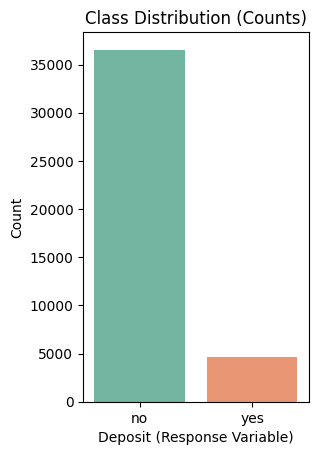

In [56]:
# Bar plot the class distribution (counts)
plt.subplot(1, 2, 1)
sns.countplot(x='deposit', data=bank_copy, hue='deposit', palette='Set2', legend=False)
plt.title('Class Distribution (Counts)')
plt.xlabel('Deposit (Response Variable)')
plt.ylabel('Count')

Text(0, 0.5, 'Percentage')

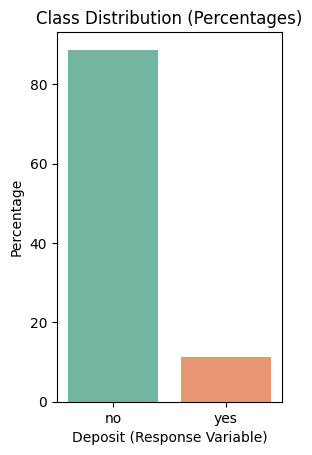

In [57]:
# Bar plot the class distribution (percentages)
plt.subplot(1, 2, 2)
sns.barplot(x=class_percentages.index, y=class_percentages.values, hue=class_percentages.index, palette='Set2', dodge=False)
plt.title('Class Distribution (Percentages)')
plt.xlabel('Deposit (Response Variable)')
plt.ylabel('Percentage')

### 3.2 Basic statistics 

Let's now view some basic statistics about numeric columns.

In [50]:
bank_copy.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- Observing "duration", we can identify that the minimum value for this column is 0, while the maximum is 4918.
- The mean value is around 258, and the upper 75% quantile is 319. 
- It seeems highly likely that the row that has 4918 is an outlier or a mistake. Hence, it could be potentially better to remove some outliers of this column in the data cleansing process.

Although removing certain datapoints without the domain knowledge on the nature of the dataset could lead to biased analysis, we will remove datapoints that have value above 1500 on "duration" for the simplicity of the statistical analysis later on. 

### 3.3 Univariate EDA for categorical variables

Univariate EDAs can be conducted to identify the relationships with “deposit” and some of the
categorical variables that may have a significant effect on “deposit” by intuition. E.g., “job”, “marital”,
and “education”, "poutcome".

In [63]:
bank_schema['job']

'Job'

'job' indicates the job of the client

In [66]:
bank_copy['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

There are 12 different unique categories in 'job'. 

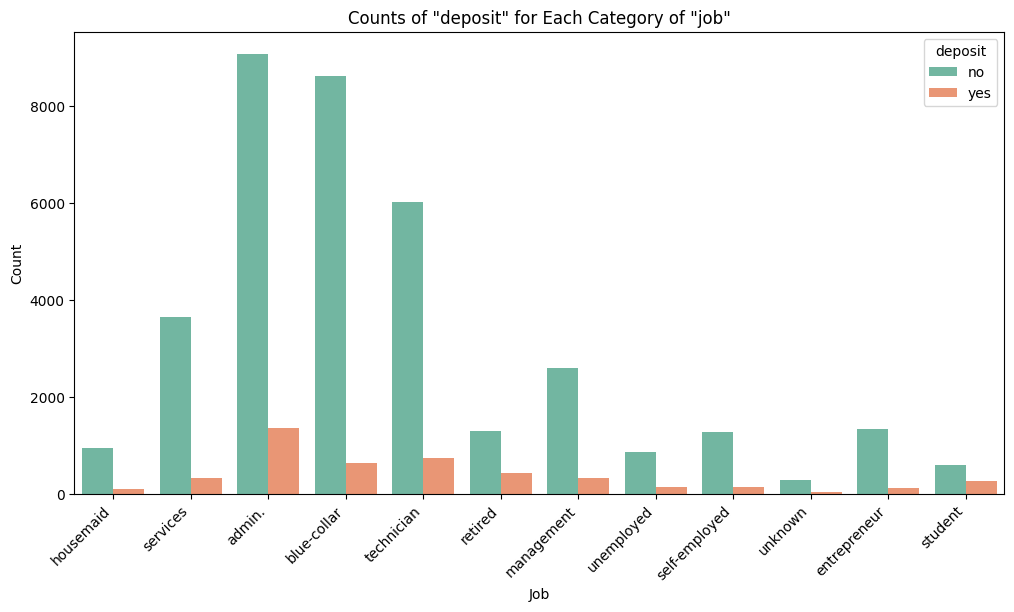

In [62]:
#EDA on 'job' vs 'deposit'
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='deposit', data=bank_copy, palette='Set2')
plt.title('Counts of "deposit" for Each Category of "job"')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

- The bar chart illustrates that job categories like admin, blue-collar, and technician exhibit both the highest "yes" and "no" rates for 'deposit.' 
- However, this observation may be attributed to the fact that a substantial proportion of clients fall within these occupation categories. Consequently, it becomes challenging to make a definitive association. 

To gain further insights, we can explore the percentage of clients making deposits within each 'job' category.

In [72]:
# Calculate the percentage of 'deposit' for each category of 'job'
percentage_by_job = bank_copy.groupby(['job', 'deposit']).size() / bank_copy.groupby('job').size() * 100
percentage_by_job = percentage_by_job.reset_index(name='percentage')

In [73]:
percentage_by_job

,job,deposit,percentage
0,admin.,no,87.027442
1,admin.,yes,12.972558
2,blue-collar,no,93.105684
3,blue-collar,yes,6.894316
4,entrepreneur,no,91.483516
5,entrepreneur,yes,8.516484
6,housemaid,no,90.000000
7,housemaid,yes,10.000000
8,management,no,88.782490
9,management,yes,11.217510


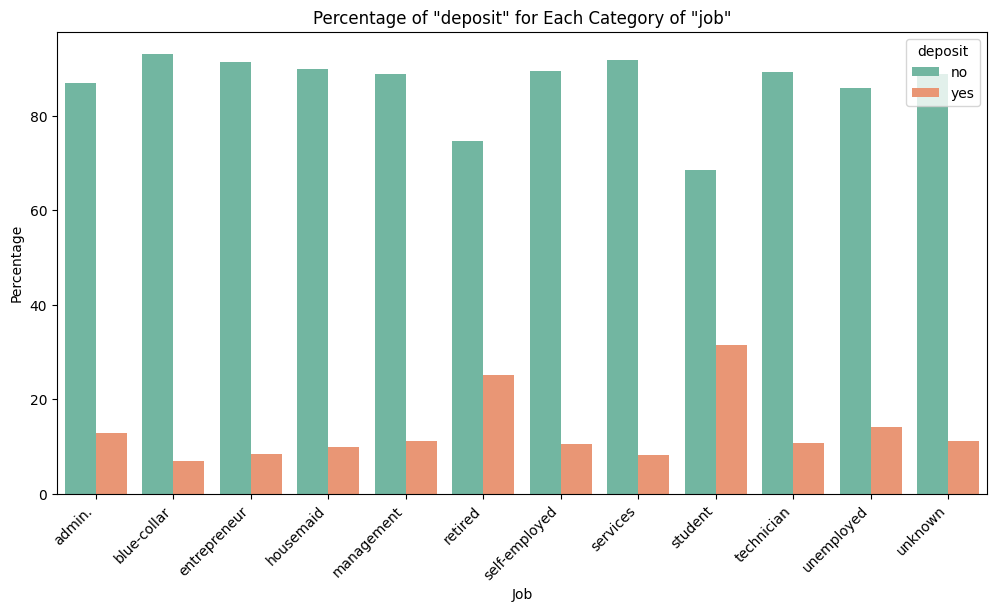

In [74]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='job', y='percentage', hue='deposit', data=percentage_by_job, palette='Set2')
plt.title('Percentage of "deposit" for Each Category of "job"')
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

- As expected, the percentage of clients making deposits is similar across all categories of 'job', which are mostly below 15%. 
- Clients who are 'retired' and 'student' presented relatively higher rate of making deposits of 25.2% and 31.4% respectively. 
- This could be easily assumed since clients in these categories are prone to saving up and have relatively limited income than clients in other job categories. 
- Therefore, it was difficult to identify interesting associations between 'job' and 'deposit'. 

Now, let's take a look at 'marital'.

In [67]:
bank_schema['marital']

'Marital status '

'marital' indicates the marital status of the client.

In [69]:
bank_copy['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

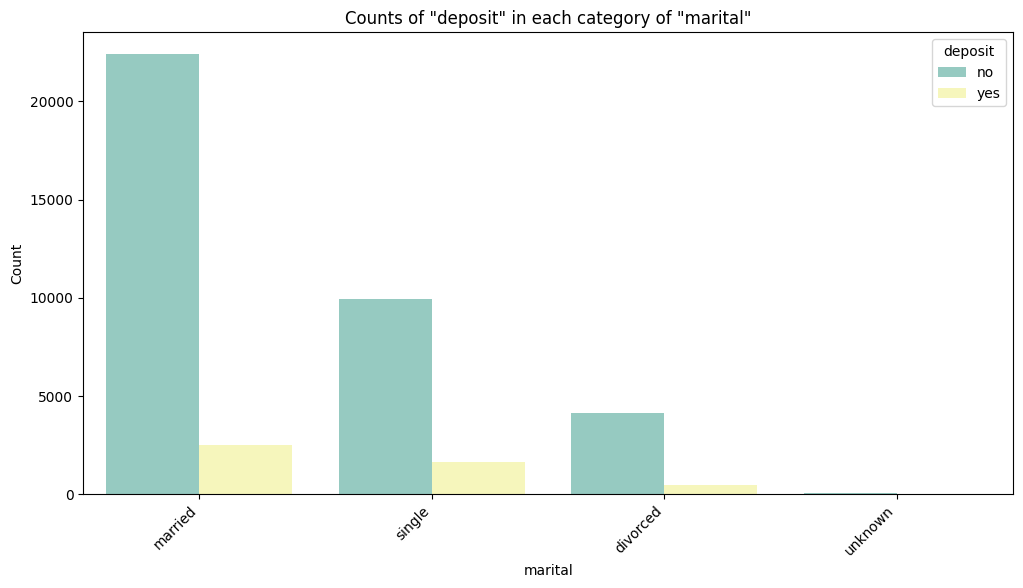

In [75]:
#EDA on 'marital' vs 'deposit'
plt.figure(figsize = (12,6))
sns.countplot(x = 'marital', hue = 'deposit', data = bank_copy, palette = 'Set3')
plt.title('Counts of "deposit" in each category of "marital"')
plt.xlabel('marital')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Similar to the bar chart on the counts of 'job' vs 'deposit', it is ambiguous to identify a clear trend. We could try to plot the bar chart of percentages in each class of 'marital'. 

In [78]:
# Calculate the percentage of 'deposit' for each category of 'marital'
percentage_by_marital = bank_copy.groupby(['marital', 'deposit']).size() / bank_copy.groupby('marital').size() * 100
percentage_by_marital = percentage_by_marital.reset_index(name='percentage')

In [81]:
percentage_by_marital

,marital,deposit,percentage
0,divorced,no,89.679098
1,divorced,yes,10.320902
2,married,no,89.842747
3,married,yes,10.157253
4,single,no,85.995851
5,single,yes,14.004149
6,unknown,no,85.000000
7,unknown,yes,15.000000


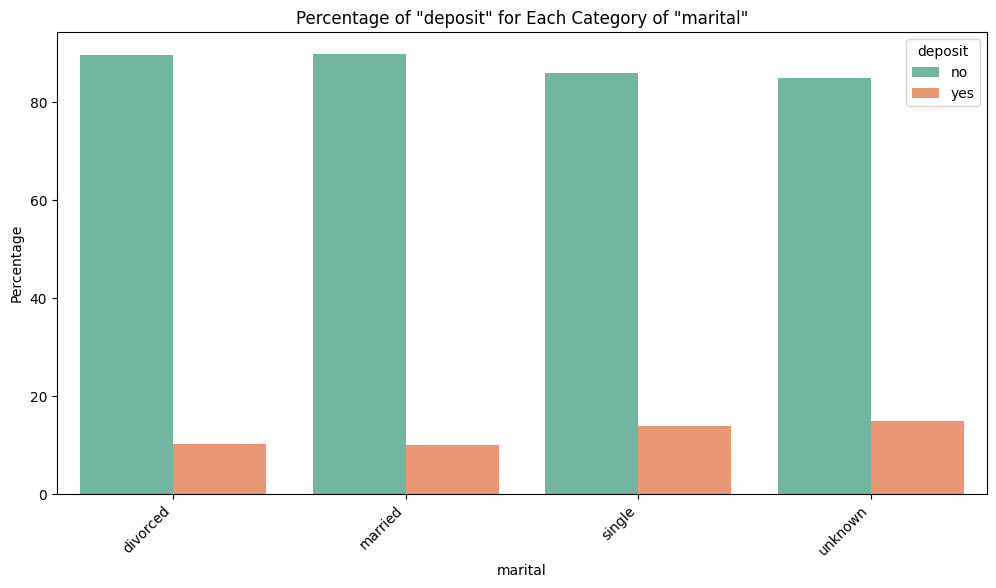

In [80]:
#Create a bar plot for percentages 
plt.figure(figsize = (12,6))
sns.barplot(x='marital', y='percentage', hue='deposit', data = percentage_by_marital, palette='Set2')
plt.title('Percentage of "deposit" for Each Category of "marital"')
plt.xlabel('marital')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The percentage of clients making deposits is similar across all categories of 'marital', which are generally below 15%. Hence, 'marital' is not likely to be a good predictor for 'deposit'. 

Now, let's take a look at 'education'.

In [83]:
bank_schema['education']

'Level of education received'

'education' indicates the level of education that a client has received. 

In [86]:
bank_copy['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

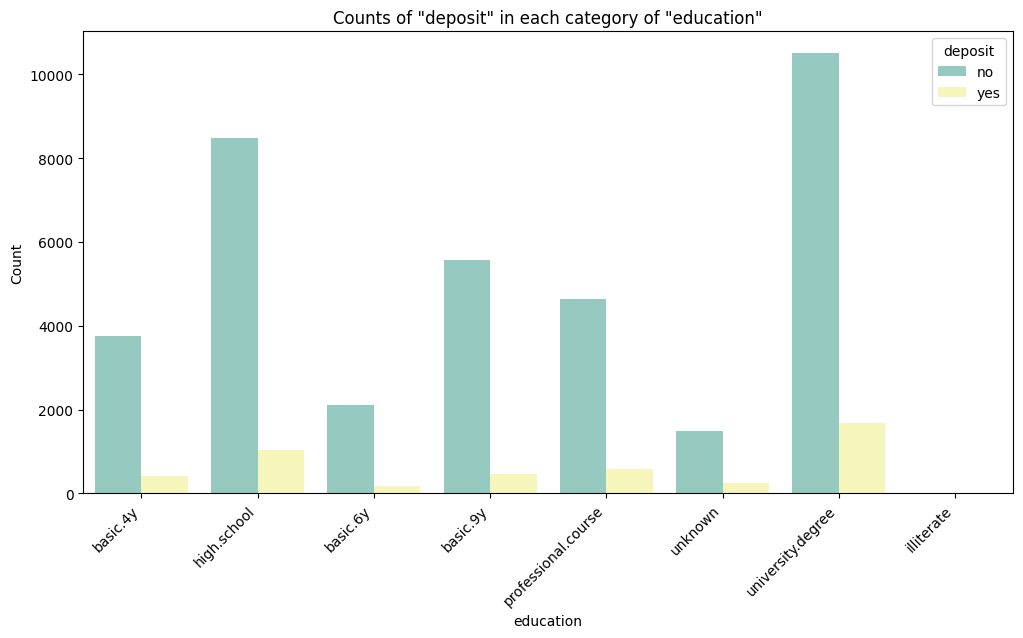

In [87]:
#EDA on 'education' vs 'deposit'
plt.figure(figsize=(12,6))
sns.countplot(x='education', hue='deposit', data=bank_copy, palette = 'Set3')
plt.title('Counts of "deposit" in each category of "education"')
plt.xlabel('education')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Let's also look at the bar chart on percentages. 

In [88]:
# Calculate the percentage of 'deposit' for each category of 'education'
percentage_by_education = bank_copy.groupby(['education', 'deposit']).size() / bank_copy.groupby('education').size() * 100
percentage_by_education = percentage_by_education.reset_index(name='percentage')

In [89]:
percentage_by_education

,education,deposit,percentage
0,basic.4y,no,89.750958
1,basic.4y,yes,10.249042
2,basic.6y,no,91.797557
3,basic.6y,yes,8.202443
4,basic.9y,no,92.175352
5,basic.9y,yes,7.824648
6,high.school,no,89.164477
7,high.school,yes,10.835523
8,illiterate,no,77.777778
9,illiterate,yes,22.222222


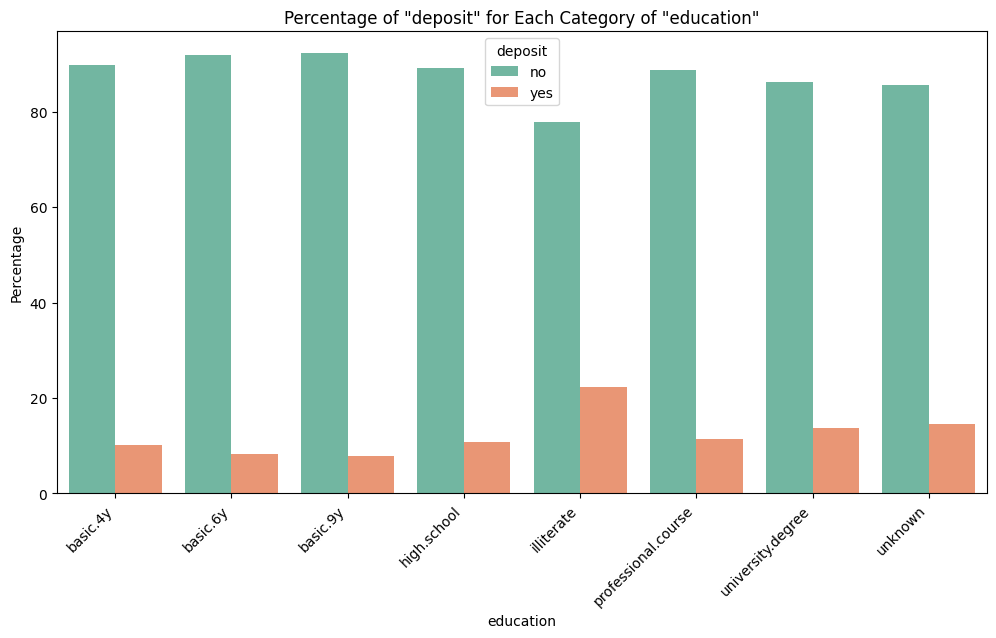

In [90]:
#Create a bar plot for percentages 
plt.figure(figsize = (12,6))
sns.barplot(x='education', y='percentage', hue='deposit', data = percentage_by_education, palette='Set2')
plt.title('Percentage of "deposit" for Each Category of "education"')
plt.xlabel('education')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

The percentage of clients making deposits is similar across all categories of 'education', which are generally below 15%. Clients in the "illiterate" category showed the highest rate of 22.2%, but it still doesn't seem to give important implications. 

Lastly, let's observe 'poutcome'. 

In [91]:
bank_schema['poutcome']

'outcome of the previous marketing campaign'

'poutcome' indicates the outcome of the previous marketing campaign towards the current clients. 

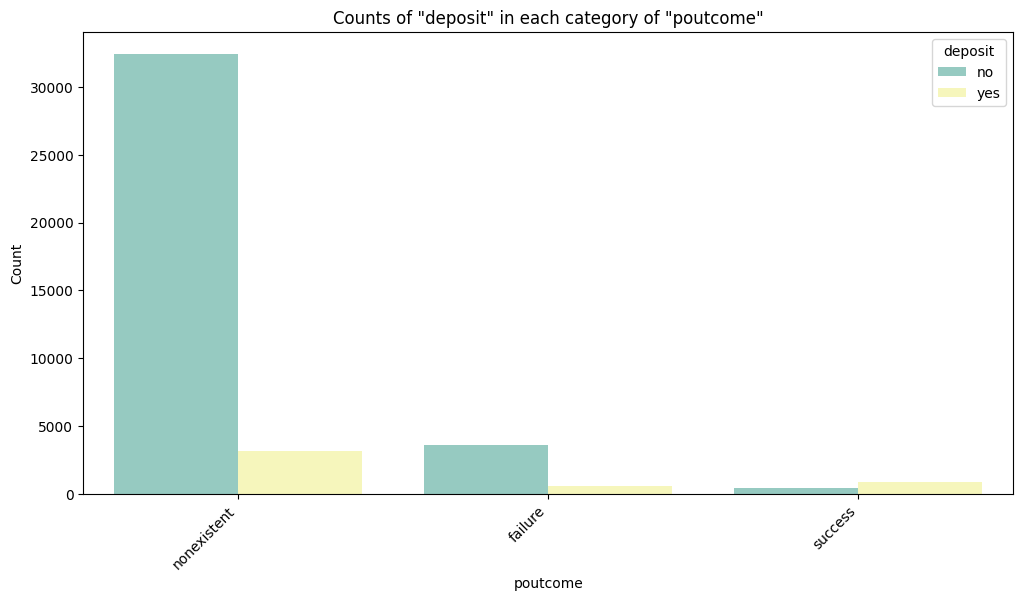

In [92]:
#EDA on 'education' vs 'deposit'
plt.figure(figsize=(12,6))
sns.countplot(x='poutcome', hue='deposit', data=bank_copy, palette = 'Set3')
plt.title('Counts of "deposit" in each category of "poutcome"')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

- Based on the plots, it shows that the previous marketing campaign outcome did not exist for most current customers, which implies that most of them are new customers who have not been contacted earlier. 
- Looking at the 'success' category, we could observe that the counts on 'yes' and 'no' of 'deposit' are not significantly different. 

Let's have a look at the percentages. 

In [93]:
# Calculate the percentage of 'deposit' for each category of 'education'
percentage_by_poutcome = bank_copy.groupby(['poutcome', 'deposit']).size() / bank_copy.groupby('poutcome').size() * 100
percentage_by_poutcome = percentage_by_poutcome.reset_index(name='percentage')

In [94]:
percentage_by_poutcome

,poutcome,deposit,percentage
0,failure,no,85.771402
1,failure,yes,14.228598
2,nonexistent,no,91.167787
3,nonexistent,yes,8.832213
4,success,no,34.887109
5,success,yes,65.112891


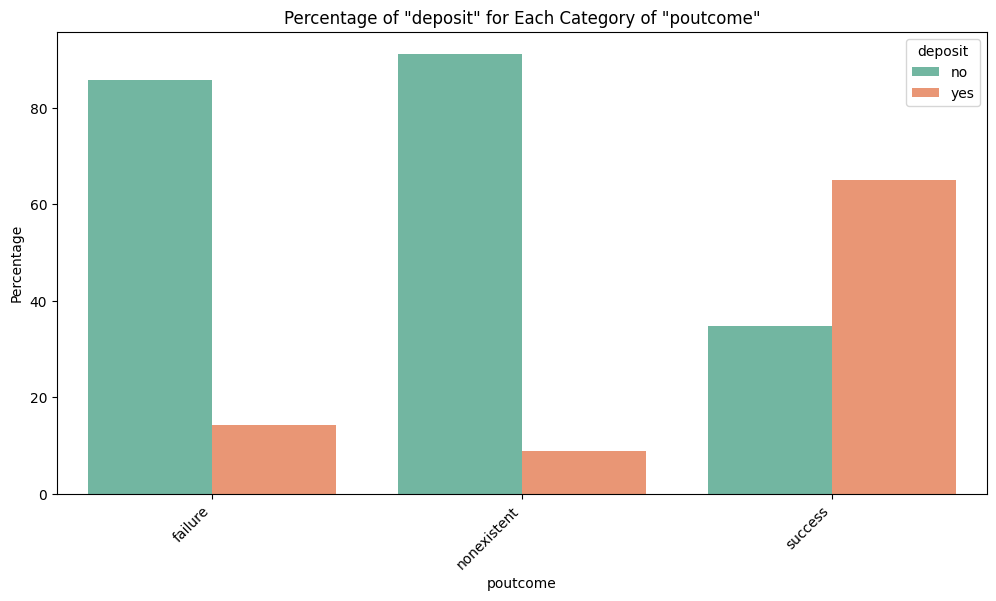

In [95]:
#Create a bar plot for percentages 
plt.figure(figsize = (12,6))
sns.barplot(x='poutcome', y='percentage', hue='deposit', data = percentage_by_poutcome, palette='Set2')
plt.title('Percentage of "deposit" for Each Category of "poutcome"')
plt.xlabel('poutcome')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Interestingly, we could identify that for the customers who had a successful outcome from the
previous campaign, more than 65% of those customers has subscribed for a term deposit again. Such
an observation implies that “poutcome” could be a strong predictor for the response variable.

### 3.4 Univariate EDA for numerical variables

Further univariate EDAs can be conducted to identify the relationships with “deposit” and some of the
numerical variables that may have a significant effect on “deposit” by intuition. E.g., “duration”,“emp.var.rate”, “euribor3m”, and “age”. 

Let's start with 'duration'.

In [97]:
bank_schema['duration']

'Last contact duration'

'duration' indicates the duration time of the last contact (telephone call) in seconds with the client.

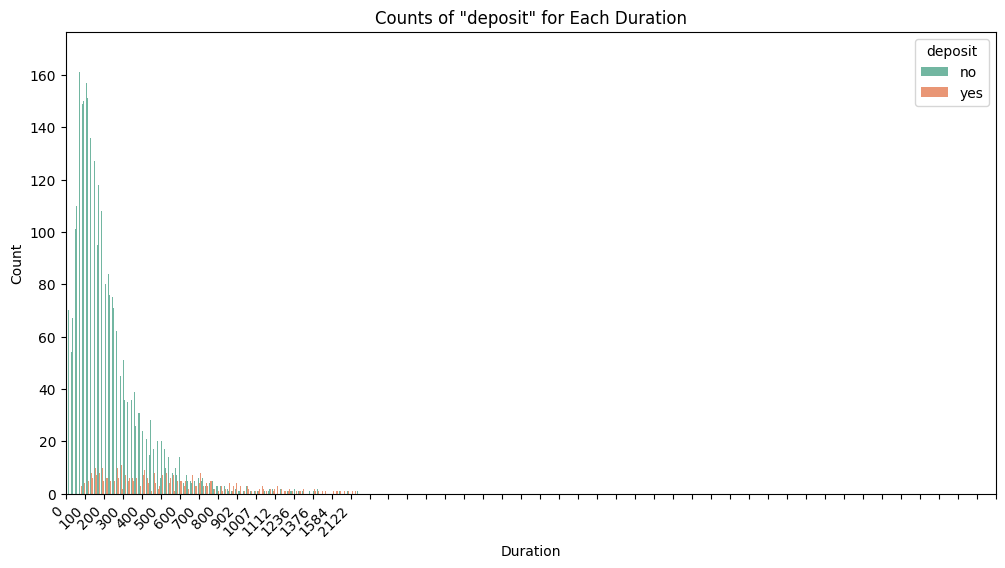

In [103]:
#EDA on 'duration' vs 'deposit'
plt.figure(figsize=(12, 6))
sns.countplot(x='duration', hue='deposit', data=bank_copy, palette='Set2')
plt.title('Counts of "deposit" for Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(ticks=range(0, max(bank_copy['duration']), 100), rotation=45, ha='right')
plt.show()

- The frequency bar plots indicates that “duration” highly affects the response variable “deposit”, such that if “duration” is between 0 to 100 seconds, then “deposit” tends to be “no” significantly. 
- However, the duration seconds of the call cannot be known before the call is performed, and hence this feature should only be considered for benchmark purposes and should be eliminated when building a realistic predictive model.


We can then look at the social-economic attributes. 

In [105]:
bank_schema['emp.var.rate']

'employment variation rate — quarterly indicator'

In [106]:
bank_schema['euribor3m']

'euribor 3 month rate — daily indicator'

'emp.var.rate' indicates the employment variation rate and 'euribor3m' indicates the euribor 3 month rate.

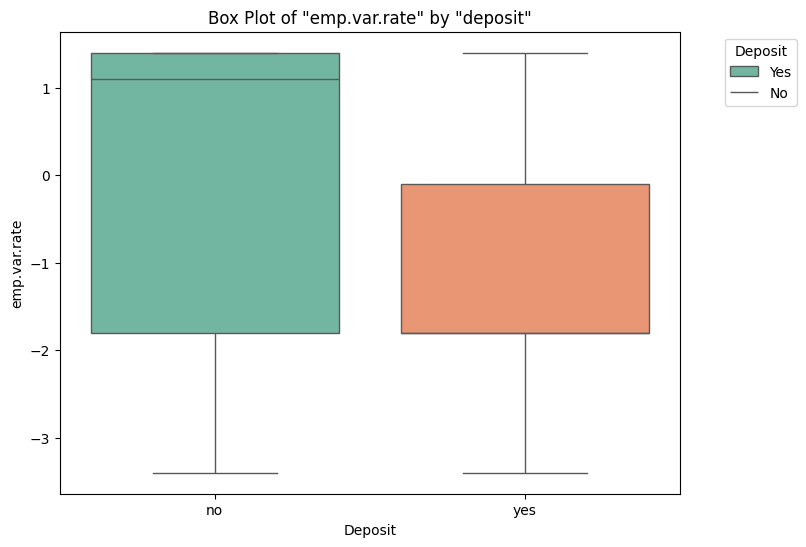

In [109]:
#EDA on "emp.var.rate" vs "deposit"
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='emp.var.rate', hue='deposit', data=bank_copy, palette='Set2')
plt.title('Box Plot of "emp.var.rate" by "deposit"')
plt.xlabel('Deposit')
plt.ylabel('emp.var.rate')

# Explicitly set labels for legend
plt.legend(title='Deposit', labels=['Yes', 'No'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [110]:
emp_summary_stats = bank_copy.groupby('deposit')['emp.var.rate'].describe()
print(emp_summary_stats)

           count      mean       std  min  25%  50%  75%  max
deposit                                                      
no       36548.0  0.248875  1.482932 -3.4 -1.8  1.1  1.4  1.4
yes       4640.0 -1.233448  1.623626 -3.4 -1.8 -1.8 -0.1  1.4


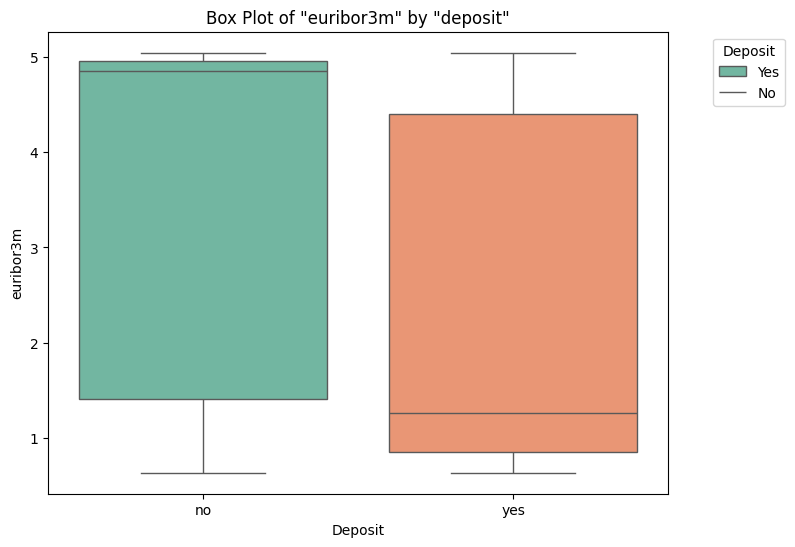

In [111]:
#EDA on "euribor3m" vs "deposit"
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='euribor3m', hue='deposit', data=bank_copy, palette='Set2')
plt.title('Box Plot of "euribor3m" by "deposit"')
plt.xlabel('Deposit')
plt.ylabel('euribor3m')

# Explicitly set labels for legend
plt.legend(title='Deposit', labels=['Yes', 'No'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [112]:
eur_summary_stats = bank_copy.groupby('deposit')['euribor3m'].describe()
print(eur_summary_stats)

           count      mean       std    min    25%    50%    75%    max
deposit                                                                
no       36548.0  3.811491  1.638187  0.634  1.405  4.857  4.962  5.045
yes       4640.0  2.123135  1.742598  0.634  0.849  1.266  4.406  5.045


Social-economic attributes such as “emp.var.rate” and “euribor3m” seem to be influential in predicting the target variable “deposit”, as the box plots and summary statistics for both covariates illustrated the big difference between the mean, median values of the “yes” and “no” deposit subscription outputs.

Lastly, we could look into 'age'. 

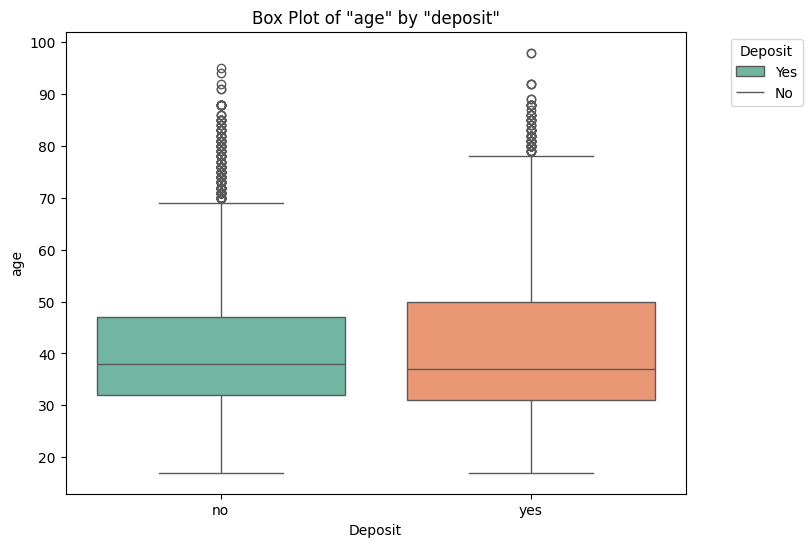

In [113]:
#EDA on "age" vs "deposit"
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='age', hue='deposit', data=bank_copy, palette='Set2')
plt.title('Box Plot of "age" by "deposit"')
plt.xlabel('Deposit')
plt.ylabel('age')

# Explicitly set labels for legend
plt.legend(title='Deposit', labels=['Yes', 'No'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [114]:
age_summary_stats = bank_copy.groupby('deposit')['age'].describe()
print(age_summary_stats)

           count       mean        std   min   25%   50%   75%   max
deposit                                                             
no       36548.0  39.911185   9.898132  17.0  32.0  38.0  47.0  95.0
yes       4640.0  40.913147  13.837476  17.0  31.0  37.0  50.0  98.0


Surprisingly, “age” seemed to be not necessarily influential, as the box plots showed a median age of
around 38-40 for both “yes” and “no” classes of the response variable

### 3.5 Correlation matrix

Lastly, a correlation matrix can be created to check potential multicollinearity issues and to
observe general correlation among the continuous independent variables.

First, we only select the variables that has numeric data type.

In [117]:
numeric_columns = bank_copy.select_dtypes(include=['number'])
print(numeric_columns)

       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  eurib

In [119]:
# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()
correlation_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


We can visualize this correlation matrix as a heatmap. 

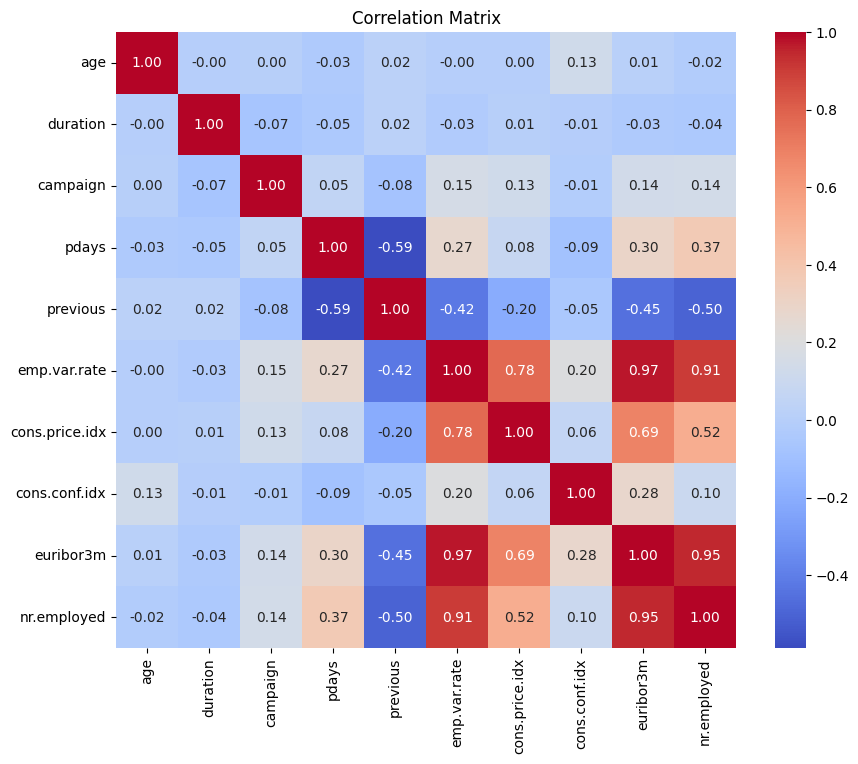

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- The correlation matrix indicates that “emp.var.rate”, “cons.price.idx”, “euribor3m” and “nr.employed” have very high correlation. 
- Specifically, “euribor3m” and “emp.var.rate” showed the highest correlation of 97%. 
- Hence, some of these highly correlated variables could be potentially removed to avoid multicollinearity issues when building the model. 